# Demos with HMF+PCA

In [2]:
%pylab inline
import hpca
import numpy as np
import empca
from numpy.polynomial import legendre

Populating the interactive namespace from numpy and matplotlib


## Generate some toy data

In [3]:
nvec = 5
nx = 100
nobs = 500
x = np.linspace(-1, 1, nx)
data = np.zeros((nobs, nx))
for i in range(nobs):
    c = np.random.uniform(-1, 1, size=nvec)
    data[i] = legendre.legval(x, c)

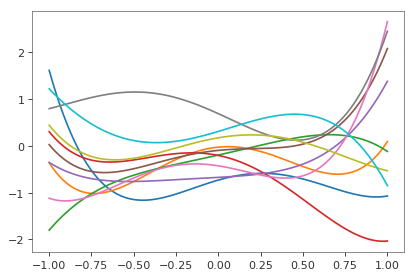

In [4]:
for i in range(10):
    plot(x, data[i])

## Compare PCA with HMF+PCA on noiseless data
They should agree

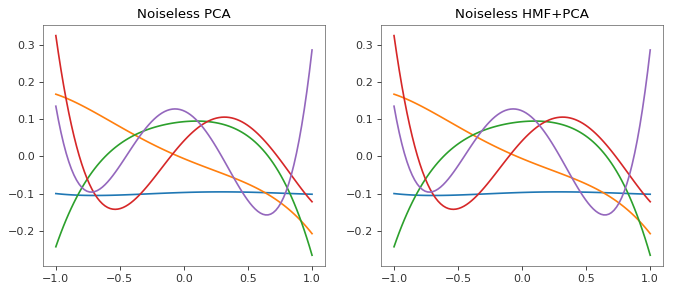

In [5]:
v = hpca.pca(data)
h = hpca.HMF(data).pca()

figure(figsize=(10,4))
subplot(121)
title('Noiseless PCA')
for i in range(nvec):
    plot(x, v[i])

subplot(122)
title('Noiseless HMF+PCA')
for i in range(nvec):
    plot(x, h[i])

## Add noise to the data
80% with some noise, 20% with extra noise

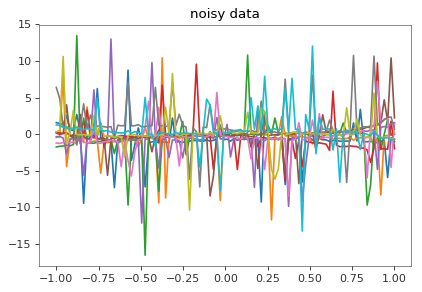

In [6]:
sigma = np.ones_like(data) * 0.1
ii = np.random.uniform(0,1,size=data.shape)>0.8
sigma[ii] = 5.0
weights = 1/sigma**2
noisy = data + np.random.normal(scale=sigma)
for i in range(10):
    plot(x, noisy[i])

title('noisy data')

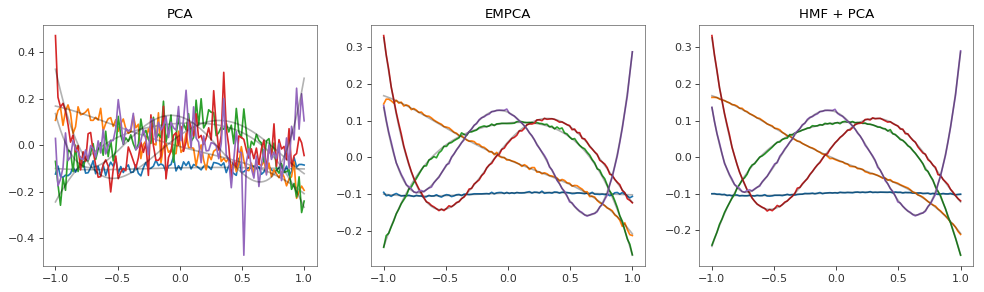

In [7]:
vx = hpca.pca(noisy)
hx = hpca.HMF(noisy, weights).pca()
ex = empca.empca(noisy, weights, silent=True)

figure(figsize=(15,4))
subplot(131)
title('PCA')
for i in range(nvec):
    s = np.sign(np.dot(v[i], vx[i]))
    plot(x, vx[i]*s)
    plot(x, v[i], 'k-', alpha=0.3)

subplot(132)
title('EMPCA')
for i in range(nvec):
    s = np.sign(np.dot(v[i], ex.eigvec[i]))
    plot(x, ex.eigvec[i]*s)
    plot(x, v[i], 'k-', alpha=0.3)

subplot(133)
title('HMF + PCA')
for i in range(nvec):
    s = np.sign(np.dot(v[i], hx[i]))
    plot(x, hx[i]*s)
    plot(x, v[i], 'k-', alpha=0.3)


# Fun with missing data #

In [8]:
nvec = 5
nx = 100
nobs = 5000
x = np.linspace(-1, 1, nx)
data = np.zeros((nobs, nx))
for i in range(nobs):
    c = np.random.uniform(-1, 1, size=nvec)
    data[i] = legendre.legval(x, c)

sigma = 0.1
dx = np.ones_like(data) * 1000
weights = np.zeros_like(dx)

nkeep = int(0.4*nx)
for i in range(nobs):
    a = np.random.randint(-nkeep//2, nx-nkeep//2)
    # a = np.random.randint(-nkeep, nx-1)
    b = min(a+nkeep, nx)
    a = max(a, 0)
    dx[i,a:b] = data[i,a:b] + np.random.normal(scale=sigma, size=b-a)
    weights[i, a:b] = 1/sigma**2

# fkeep = 0.2
# keep = (np.random.uniform(0,1,size=data.shape) < fkeep)
# dx[keep] = data[keep] + np.random.normal(scale=sigma, size=np.count_nonzero(keep))
# weights[keep] = 1/sigma**2

ex = empca.empca(dx, weights, silent=True)
hmx = hpca.HMF(dx, weights)
hx = hmx.pca()

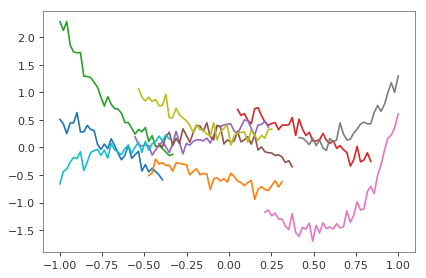

In [9]:
for i in range(10):
    ytmp = dx[i].copy()
    ytmp[weights[i] == 0.0] = np.nan
    plot(x, ytmp)

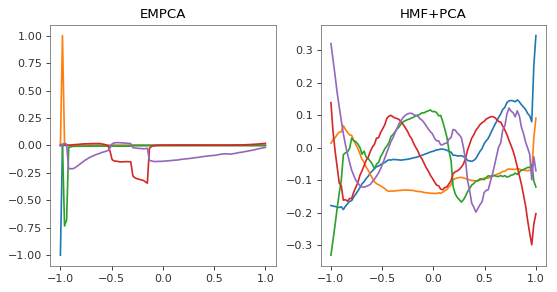

In [10]:
figure(figsize=(8,4))
subplot(121)
title('EMPCA')
for i in range(nvec):
    s = np.sign(np.dot(v[i], ex.eigvec[i]))
    plot(x, ex.eigvec[i]*s)
    # plot(x, v[i], 'k-', alpha=0.3)

subplot(122)
title('HMF+PCA')
for i in range(nvec):
    s = np.sign(np.dot(v[i], hx[i]))
    plot(x, hx[i]*s)
    # plot(x, v[i], 'k-', alpha=0.3)

(0, 1)

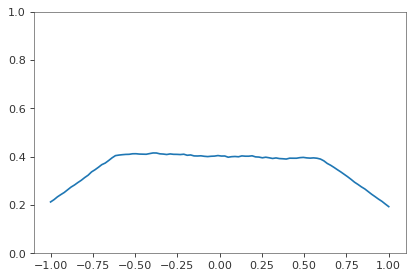

In [11]:
plot(x, np.sum(weights!=0, axis=0) / nobs)
ylim(0, 1)

In [12]:
ex.data[np.isnan(ex.data)] = 0.0
exchi2 = np.sum((ex.data-ex.model)**2 * ex.weights)
hxchi2 = np.sum((hmx.data - hmx.model)**2 * hmx.weights)

In [14]:
dof = np.count_nonzero(weights != 0)
print(exchi2/dof, hxchi2/dof)

3.15062708537 0.882844621742
